In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler



In [2]:
#Read in the different datasets
#Read in store
store=pd.read_csv('../data/store.csv')
#Read in test data
test=store_data=pd.read_csv('../data/test.csv')

#Read in train data 
train=store_data=pd.read_csv('../data/train.csv')

#Read in sample submission 
sample_submission=store_data=pd.read_csv('../data/sample_submission.csv')

train.shape, test.shape, store.shape

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((1017209, 9), (41088, 8), (1115, 10))

# Isolate the Rossmann Store Sales dataset into time series data

In [20]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
storedata = pd.read_csv("../data/train.csv", index_col=[2])
storeSales = storedata[['Sales']]
storeSales.head()

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


In [5]:
scaler = MinMaxScaler()
scaler.fit(storeSales.Sales.values.reshape([-1, 1]))
storesalesScaled = scaler.transform(storeSales.Sales.values.reshape(-1, 1))

storeSales['storeSalesScaled'] = storesalesScaled

storeSales

/Users/rssebudandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Sales,storeSalesScaled
Date,,
2015-07-31,5263,0.126664
2015-07-31,6064,0.145941
2015-07-31,8314,0.200091
2015-07-31,13995,0.336815
2015-07-31,4822,0.116050
...,...,...
2013-01-01,0,0.000000
2013-01-01,0,0.000000
2013-01-01,0,0.000000


In [6]:
#describe
storeSales.describe()

,Sales,storeSalesScaled
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,1.389574e-01
std,3.849926e+03,9.265544e-02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,8.969700e-02
50%,5.744000e+03,1.382398e-01
75%,7.856000e+03,1.890689e-01
max,4.155100e+04,1.000000e+00


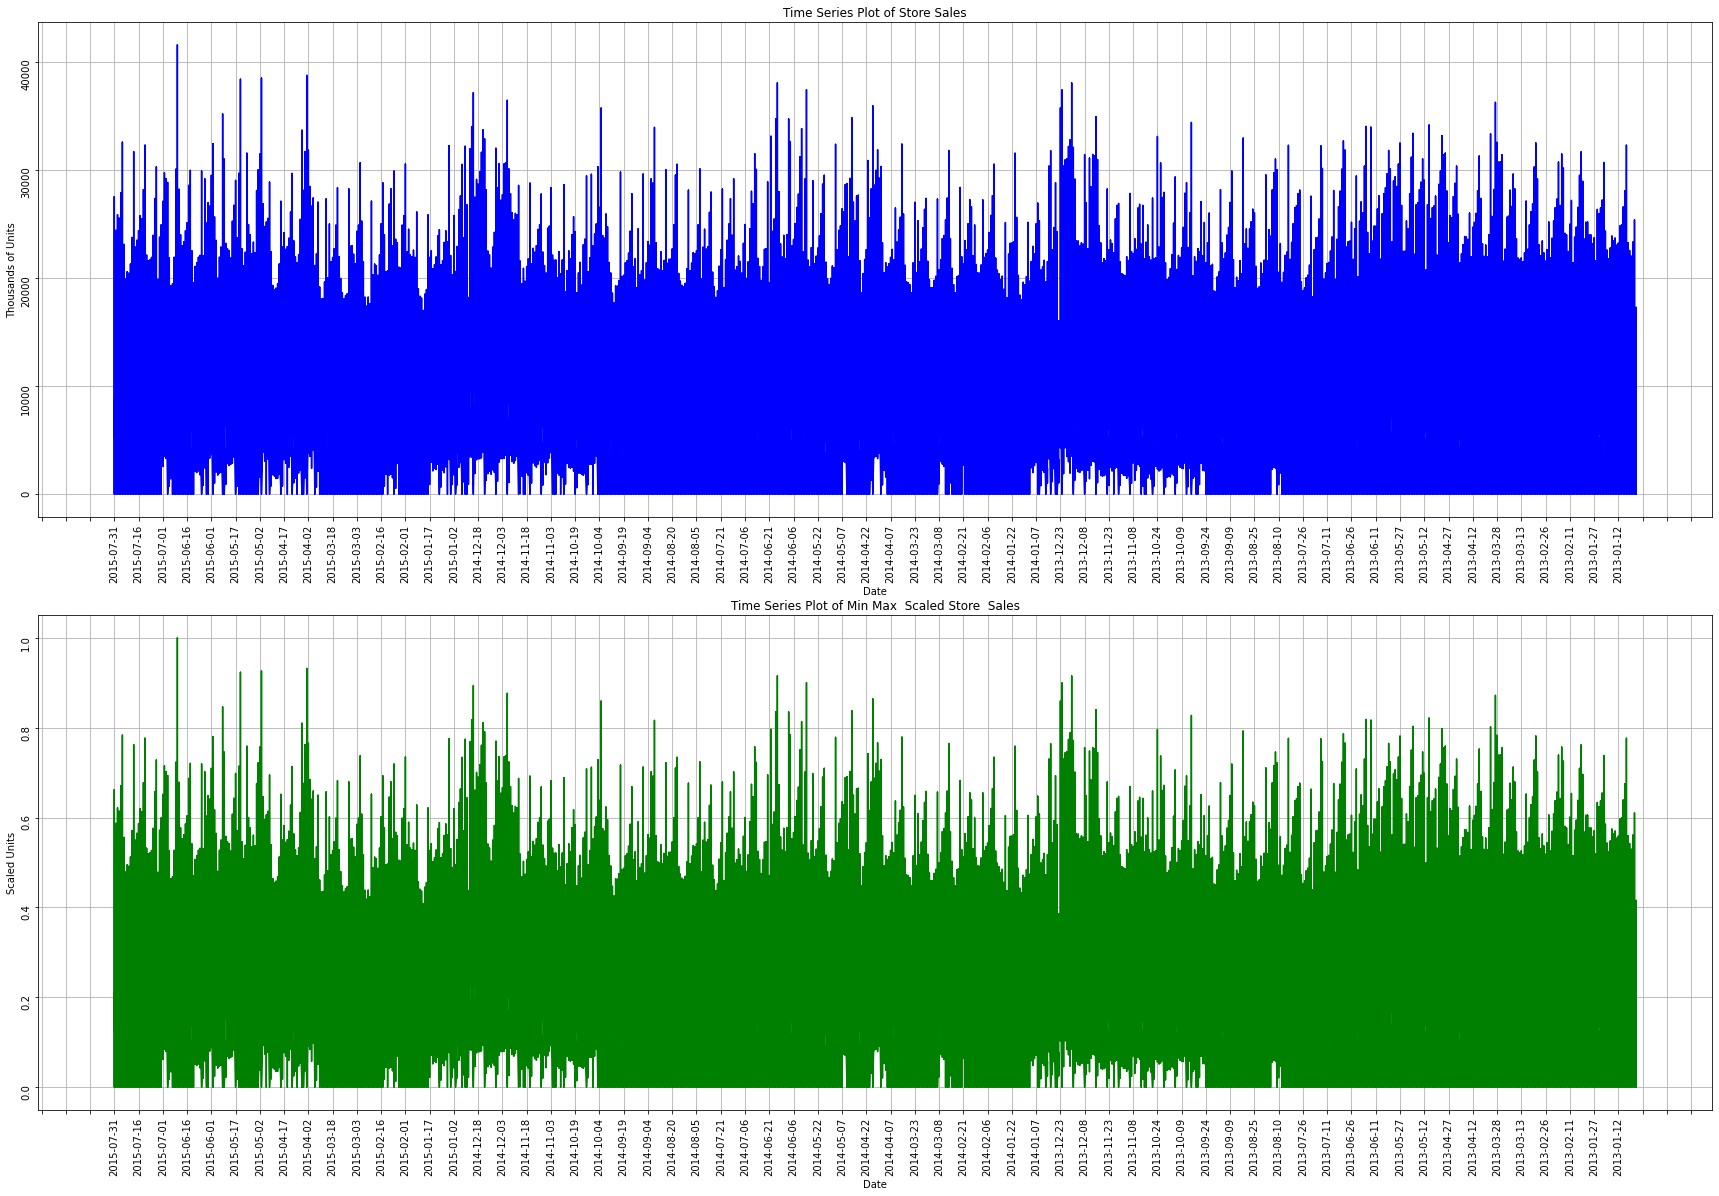

In [7]:
#Check if the scaling does not change anything in the data 

fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(storeSales.index, storeSales.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of Store Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(storeSales.index, storeSales.storeSalesScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max  Scaled Store  Sales')
ax2.grid(True)
plt.show()

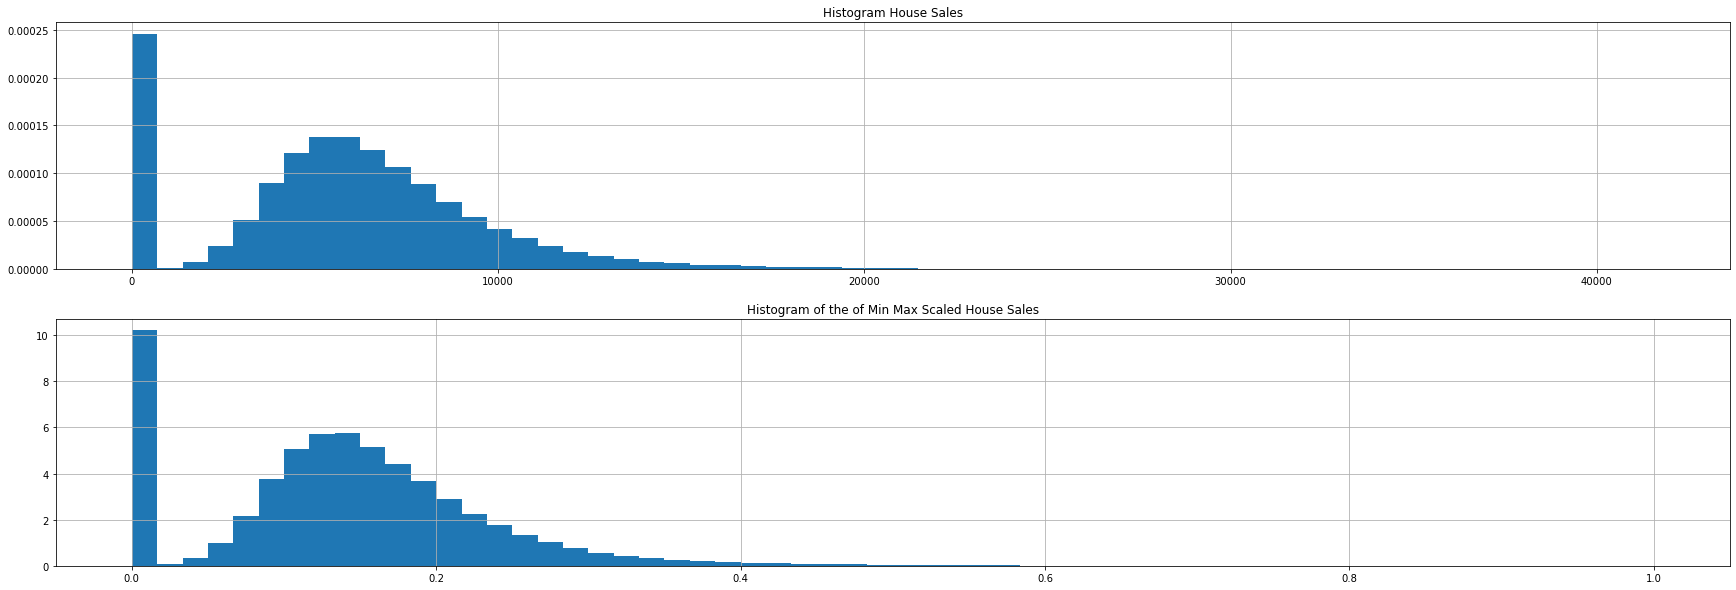

In [8]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(10)
fig.set_figwidth(30)
fig.tight_layout(pad=6)

ax1 = fig.add_subplot(gs[0,0])
ax1.hist(storeSales.Sales, density=True, bins=60)
ax1.title.set_text('Histogram House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(storeSales.storeSalesScaled, density=True, bins=60)
ax2.title.set_text('Histogram of the of Min Max Scaled House Sales')
ax2.grid(True)
plt.show()

# Check whether your time Series Data is Stationary

In [ ]:
#Unit Root Tests helps us determine the stationarity of our data
#Null Hypothesis (H0): If failed to be rejected, it suggests the 
#time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
#Alternate Hypothesis (H1): The null hypothesis is rejected; 
#it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [13]:
X = storeSales.Sales.values
result = adfuller(X,autolag=None)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -21.511762
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [14]:
X = storeSales.storeSalesScaled.values
result = adfuller(X,autolag=None)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.511762
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


#p-value > 0.05: Fail to reject the null hypothesis (H0),
#the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0),
#the data does not have a unit root and is stationary.

Therefore our data is stationary 

# Removing stationary

In [15]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [18]:
storeSalesDif = difference(storeSales.storeSalesScaled.values)

In [19]:
storeSalesDif

0          0.019278
1          0.054150
2          0.136724
3         -0.220765
4          0.019951
             ...   
1017203    0.000000
1017204    0.000000
1017205    0.000000
1017206    0.000000
1017207    0.000000
Length: 1017208, dtype: float64

# Checking for autocorrelation and partial autocorrelation in the data

In [22]:
acfSalesScaled = acf(storeSales.storeSalesScaled.values, fft=True, nlags=40)
acfSalesScaledNp = np.array(acfSalesScaled)

In [23]:
def corrPlots(array: np.array, prefix: str):
    plt.figure(figsize=(30, 5))
    plt.title(f"{prefix}  Autocorrelations of Store Sales Min Max Scaled")
    plt.bar(range(len(array)), array)
    plt.grid(True)
    plt.show()

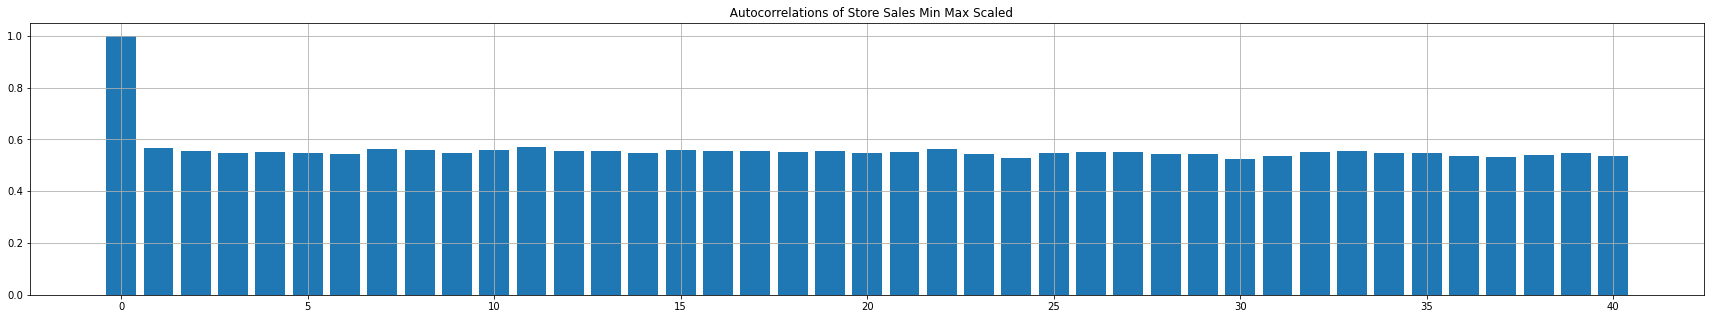

In [24]:
corrPlots(acfSalesScaledNp, '')

In [25]:
#checking  for partial

pacfSalesScaled = pacf(storeSales.storeSalesScaled.values, nlags=40)
pacfSalesScaledNp = np.array(pacfSalesScaled)

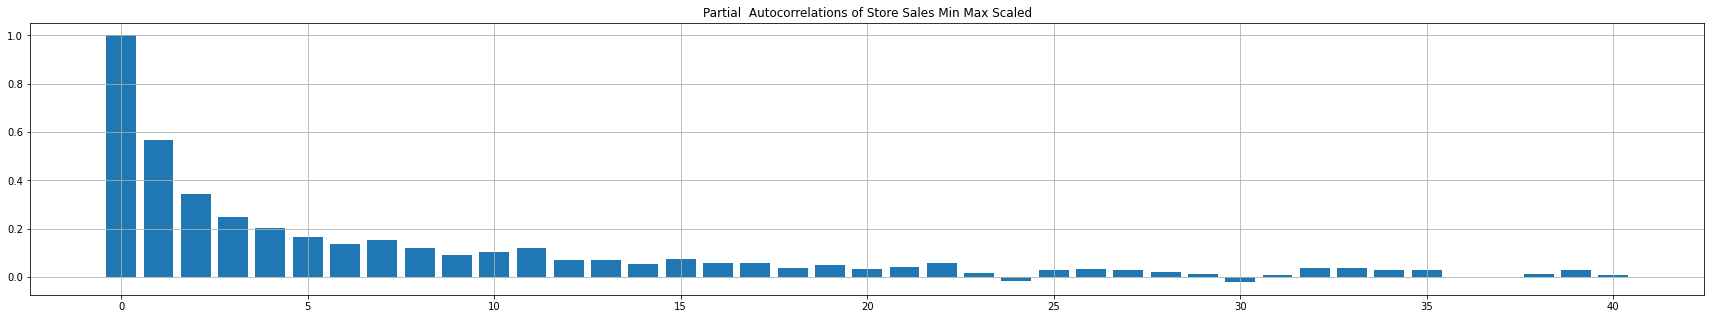

In [26]:
corrPlots(pacfSalesScaledNp, "Partial")

# Transform the time series data into supervised learning data by creating a new y(target) column. 

In [28]:
SIZE = len(storeSales.storeSalesScaled)
WINDOW_SIZE = 48
BATCH_SIZE= SIZE-WINDOW_SIZE*2
EPOCHS = 200

In [29]:
#separating into trainning and validation 

DateTrain = storeSales.index.values[0:BATCH_SIZE]
DateValid = storeSales.index.values[BATCH_SIZE:]
XTrain = storeSales.storeSalesScaled.values[0:BATCH_SIZE].astype('float32')
XValid = storeSales.storeSalesScaled.values[BATCH_SIZE:].astype('float32')

# Obtain shapes for vectors of size (,1) for dates series

DateTrain = np.reshape(DateTrain, (-1, 1))
DateValid = np.reshape(DateValid, (-1, 1))

print("Shape of the training set date series: ", DateTrain.shape)
print("Shape of the validation set date series: ", DateValid.shape)
print()
print("Shape of the training set logarithm of sales series: ", XTrain.shape)
print("Shape of the validation set logarithm of sales series in a stateless LSTM: ", XValid.shape)

Shape of the training set date series:  (1017113, 1)
Shape of the validation set date series:  (96, 1)

Shape of the training set logarithm of sales series:  (1017113,)
Shape of the validation set logarithm of sales series in a stateless LSTM:  (96,)


In [33]:
tf.random.set_seed(1234)
# add extra dimension
series = tf.expand_dims(XTrain, axis=-1)
series.shape

TensorShape([1017113, 1])

In [34]:
# create tensor from each individual element
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset

<TensorSliceDataset shapes: (1,), types: tf.float32>

In [35]:
# takes a window_size + 1 chunk from the slices
dataset = dataset.window(WINDOW_SIZE + 1, shift=1, drop_remainder=True) 

In [36]:
# Example of Window
datasetEx = tf.data.Dataset.from_tensor_slices(tf.range(10))
datasetEx = datasetEx.window(5, shift=1, drop_remainder=True)
for window in datasetEx:
    print([elem.numpy() for elem in window])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [37]:
dataset = dataset.flat_map(lambda window: window.batch(WINDOW_SIZE + 1))

In [38]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

In [39]:
dataset = dataset.batch(BATCH_SIZE).prefetch(1)

In [40]:
def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE): 
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [41]:
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)

# Build a LSTM Regression model to predict the next sale.

In [117]:
model = Sequential()
model.add(LSTM(8, input_shape=[None, 1], return_sequences=True))
model.add(LSTM(4, input_shape=[None, 1]))
model.add(Dense(1))
model.compile(loss="huber_loss", optimizer='adam')


NotImplementedError: Cannot convert a symbolic Tensor (lstm_46/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported